앞서 진행한 EDA에서 확인한 결과를 토대로, feature engineering을 진행하여 모델 성능을 높여보자

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## 데이터 불러오기

- Pregnancies: 임신 횟수
- Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압 (mm Hg)
- Skin Thickness: 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간 혈청 인슐린 (mu U /ml)
- BMI: 체질량 지수(kg / (m)^2)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능
- Age: 나이
- Outcome: (예측해야할 종속 변수) 768개 중에 268개의 결과 클래스 변수(0또는 1)는 1이고 나머지는 0 입니다.

In [2]:
df=pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##  Overfitting이란?

- 수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어서 tree가 깊어지고, 하나의 노드의 sample 수가 적어질 수 있다.
- Overfitting 되면 train 데이터는 잘 맞추지만, 새로운 데이터는 많이 틀릴 수 있다.

## Model1. Pregnancies 변수 전처리

잘게 쪼개진 임신횟수 수치형 변수를 범주형으로 변경해줍니다.

변수 추가 [Preg_high]  
- 0~6: False
- 7~ : True

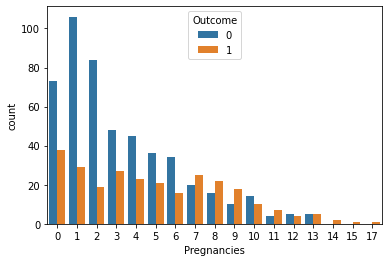

In [10]:
# 임신 횟수 7회를 기준으로 outcome 비율 달라짐
sns.countplot(data=df, x ='Pregnancies',hue='Outcome')

In [13]:
df['preg_high'] = df['Pregnancies'] > 6
df[['preg_high','Pregnancies']].head(10)

,preg_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0
5,False,5
6,False,3
7,True,10
8,False,2
9,True,8


### train, test split

In [51]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high']]
y = df['Outcome']

In [52]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

###  fit, predict

In [53]:
# 의사결정 나무 모델 만들기
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### feature 중요도

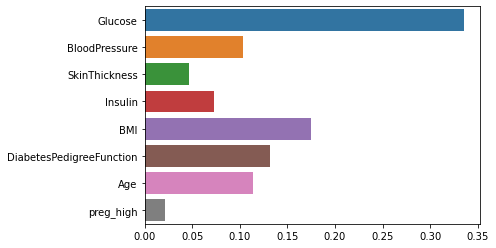

In [28]:
# 기존모델보다 pregnancies의 중요도가 내려감
sns.barplot(x=model.feature_importances_,y=X.columns)

In [30]:
model.feature_importances_

array([0.33516545, 0.10362252, 0.0465716 , 0.07248999, 0.17489795,
       0.13219179, 0.11356207, 0.02149862])

BaseModel에서 임신횟수의 피쳐 중요도는 `0.06588507` 였는데, 수치형을 범주형으로 변환해준 뒤 시행한 모델에서는 `0.02149862`으로 낮아졌다.

### 정확도 측정하기

In [31]:
accuracy_score(y_test,pred)

0.7532467532467533

BaseModel 보다 정확도가 `3%`  올랐다.

## Model2. Age 변수 전처리

[Age를 3가지 범주로 나누어주기]

- 25세 미만
- 25세 ~ 60세 미만
- 60세 이상

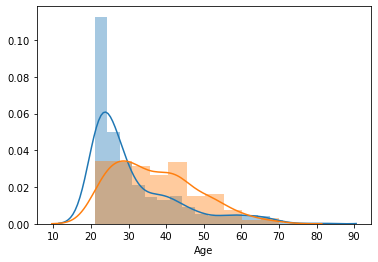

In [38]:
# 30세를 전후로 당뇨 발병율에 차이가 있음
df_0=df[df['Outcome'] == 0]
df_1=df[df['Outcome'] == 1]
sns.distplot(df_0['Age'])
sns.distplot(df_1['Age'])

In [39]:
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >=25) & (df['Age']< 60)
df['Age_high'] = df['Age'] >=60

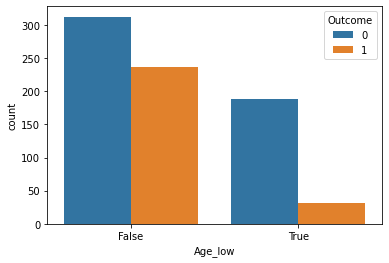

In [45]:
sns.countplot(data=df, x='Age_low', hue ='Outcome')

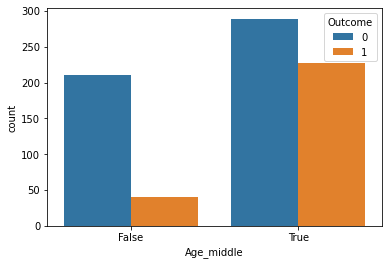

In [46]:
sns.countplot(data=df, x='Age_middle', hue ='Outcome')

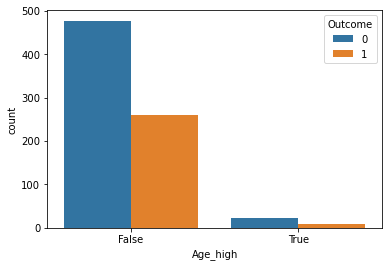

In [47]:
sns.countplot(data=df, x='Age_high', hue ='Outcome')

### train, test split

In [54]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age_low','Age_middle','Age_high', 'preg_high']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [55]:
# 의사결정 나무 모델 만들기
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### feature 중요도

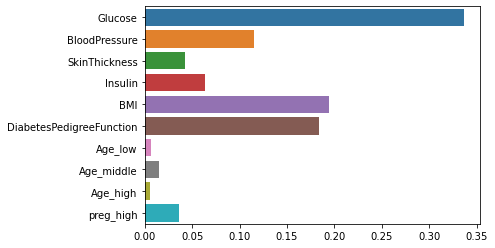

In [56]:
# 기존모델보다 pregnancies의 중요도가 내려감
sns.barplot(x=model.feature_importances_,y=X.columns)

In [57]:
model.feature_importances_

array([0.33618959, 0.11482221, 0.04232501, 0.06360043, 0.19453069,
       0.18390103, 0.00664934, 0.0155493 , 0.00604485, 0.03638756])

BaseModel에서 Age 중요도 `0.11356207`

전처리 후 
- Age_low: `0.00664934` 
- Age_middle: `0.0155493`
- Age_high: `0.00604485`



### accuracy

In [58]:
accuracy_score(y_test,pred)

0.6818181818181818

BaseModel 보다도 약 `4%` 정확도가 감소했고, Model1 보다 `7%` 감소했다.

-> 피처엔지니어링을 해주었을 때, 성능이 오르기만하는것은 아니고 오히려 떨어지기도 한다.

## Model3. 결측치 처리하기

- insulin 이 0 인것은 결측치로 볼 수 있다. 
- 해당 컬럼의 평균 값으로 대체하자

In [98]:
df['Insulin_n']=df['Insulin'].replace(0,np.nan)

In [99]:
df['Insulin_n'].isnull().sum()

374

결측치 있는 값들을 해당 컬럼의 평균값으로 변경해줍니다.

* 중요: 전체 평균으로 하면 안되고, 발병 여부에 따른 평균값으로 넣어줘야 정확도 올라감

In [100]:
df.groupby('Outcome')['Insulin_n'].mean()

Outcome
0    130.287879
1    206.846154
Name: Insulin_n, dtype: float64

- Insulin 컬럼은 결측치가 0으로 되어있고, Insulin_n은 결측치가 null 값으로 되어있다. 0은 평균에 영향을 미치고 null값은 계산되지 않으므로 평균을 구할 때 `insulin_n 컬럼을 사용`해주었다.

In [101]:
df.loc[(df['Outcome'] == 0)& (df['Insulin_n'].isnull()),'Insulin_n'] = 130.287879

df.loc[(df['Outcome'] == 1)& (df['Insulin_n'].isnull()),'Insulin_n'] = 206.846154

### train, test split

In [102]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_n',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [103]:
# 의사결정 나무 모델 만들기
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### fiture 중요도

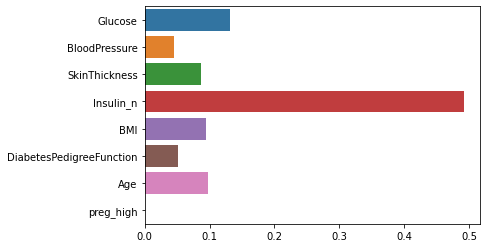

In [104]:
sns.barplot(x=model.feature_importances_,y=X.columns)

In [105]:
model.feature_importances_

array([0.13139791, 0.0457508 , 0.08740127, 0.49164724, 0.09495699,
       0.05069376, 0.09815202, 0.        ])

[중요도 변화] 
- Glucose: 20% 감소
- Insulin: 42% 증가 

BaseModel 에서는 Glucose가 가장 중요한 요소였는데, Insulin이 가장 중요한 요소로 변경됨

### accuracy

In [106]:
accuracy_score(y_test,pred)

0.8961038961038961

정확도가 BaseModel 보다 `17%` , Model1보다 `15%`올랐다. 